In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import statsmodels.api as sm

# 1. Load data (assume `df` is the cleaned dataframe)
df = pd.read_excel('questionnaire_results.xlsx',sheet_name='Sheet1')

In [ ]:
use_columns = {
    "usefulness": ["U1", "U2", "U3", "U4", "U5", "U6", "U7", "U8"],
    "ease_of_use": ["EOU1", "EOU2", "EOU3", "EOU4", "EOU5", "EOU6", "EOU7", "EOU8", "EOU9", "EOU10", "EOU11"],
    "ease_of_learning": ["EOL1", "EOL2", "EOL3", "EOL4"],
    "satisfaction": ["S1", "S2", "S3", "S4", "S5", "S6", "S7"]
}

all_columns = [col for cols in use_columns.values() for col in cols]
df_use = df[all_columns]


In [3]:
# 2. Calculate descriptive statistics for each variable
results = {}
for key, cols in use_columns.items():
    results[key] = {
        "mean": df_use[cols].mean(axis=1).mean(),
        "std_dev": df_use[cols].mean(axis=1).std(),
        "median": df_use[cols].mean(axis=1).median()
    }

# Display descriptive statistics
print("Descriptive Statistics:")
for key, stats in results.items():
    print(f"{key.capitalize()} - Mean: {stats['mean']:.2f}, Std Dev: {stats['std_dev']:.2f}, Median: {stats['median']:.2f}")


Descriptive Statistics:
Usefulness - Mean: 4.23, Std Dev: 1.58, Median: 4.88
Ease_of_use - Mean: 4.82, Std Dev: 1.13, Median: 5.18
Ease_of_learning - Mean: 5.75, Std Dev: 1.29, Median: 6.12
Satisfaction - Mean: 5.07, Std Dev: 1.03, Median: 5.36


In [4]:
from scipy.stats import pearsonr

# correlation analysis
def calculate_item_correlations(data, dimension_columns):
    correlations = {}
    for dimension, items in dimension_columns.items():
        corr_results = []
        for item in items:
            corr, p_value = pearsonr(data[item], data[items].mean(axis=1))  # 每个题项与所属维度平均值的相关性
            corr_results.append({"item": item, "correlation": corr, "p_value": p_value})
        correlations[dimension] = corr_results
    return correlations

# `use_columns` contains the question items for each dimension
item_correlations = calculate_item_correlations(df_use, use_columns)

for dimension, results in item_correlations.items():
    print(f"\nDimension: {dimension}")
    for res in results:
        print(f"Item: {res['item']}, Correlation: {res['correlation']:.3f}, P-value: {res['p_value']:.3f}")



Dimension: usefulness
Item: U1, Correlation: 0.962, P-value: 0.000
Item: U2, Correlation: 0.966, P-value: 0.000
Item: U3, Correlation: 0.939, P-value: 0.001
Item: U4, Correlation: 0.744, P-value: 0.034
Item: U5, Correlation: 0.909, P-value: 0.002
Item: U6, Correlation: 0.925, P-value: 0.001
Item: U7, Correlation: 0.892, P-value: 0.003
Item: U8, Correlation: 0.516, P-value: 0.190

Dimension: ease_of_use
Item: EOU1, Correlation: 0.842, P-value: 0.009
Item: EOU2, Correlation: 0.273, P-value: 0.513
Item: EOU3, Correlation: 0.795, P-value: 0.018
Item: EOU4, Correlation: 0.861, P-value: 0.006
Item: EOU5, Correlation: 0.736, P-value: 0.037
Item: EOU6, Correlation: 0.197, P-value: 0.639
Item: EOU7, Correlation: 0.757, P-value: 0.030
Item: EOU8, Correlation: 0.513, P-value: 0.193
Item: EOU9, Correlation: 0.772, P-value: 0.025
Item: EOU10, Correlation: 0.943, P-value: 0.000
Item: EOU11, Correlation: 0.812, P-value: 0.014

Dimension: ease_of_learning
Item: EOL1, Correlation: 0.985, P-value: 0.00

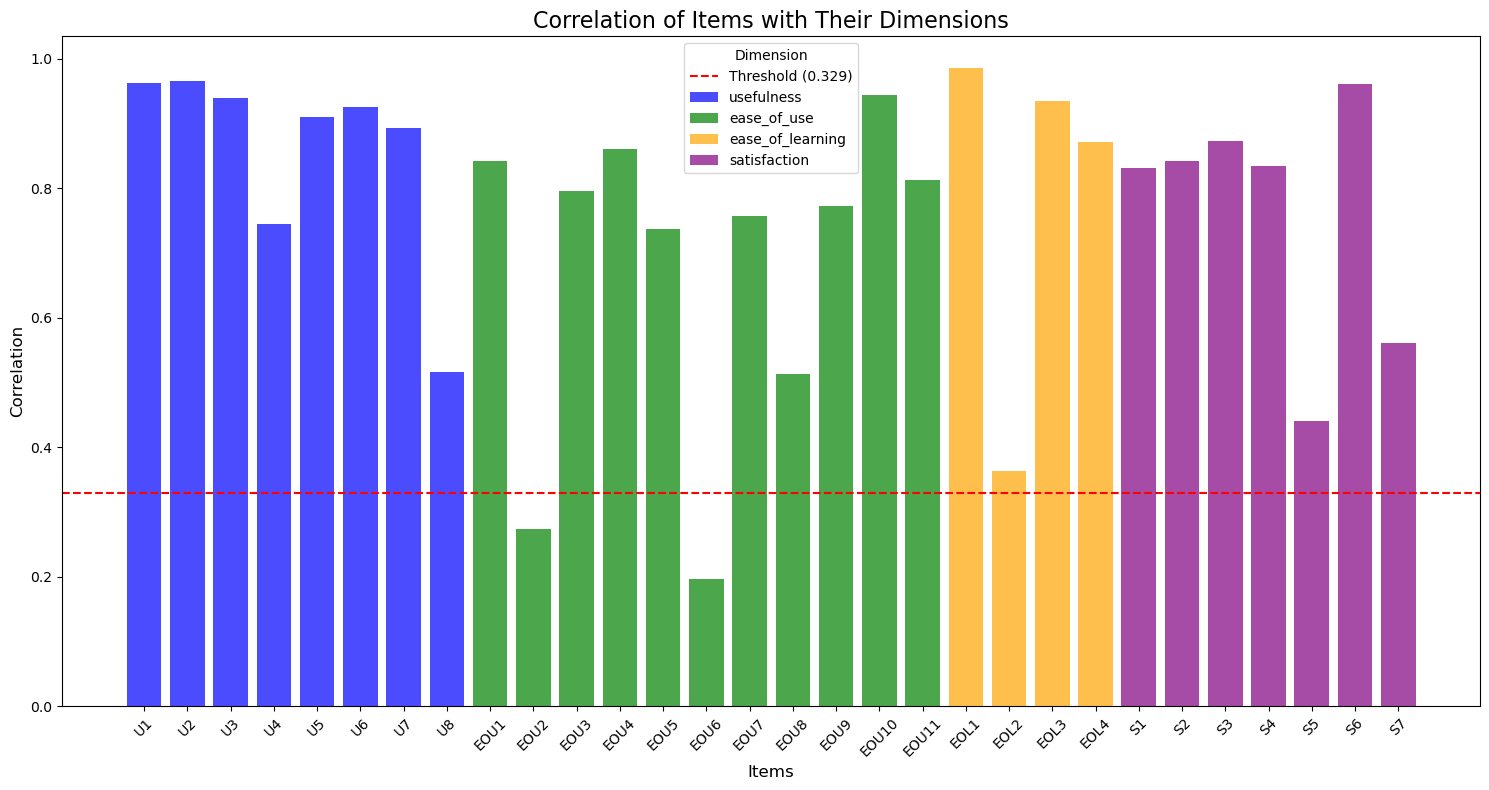

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Input data for plotting
data = {
    "usefulness": {
        "U1": 0.962, "U2": 0.966, "U3": 0.939, "U4": 0.744,
        "U5": 0.909, "U6": 0.925, "U7": 0.892, "U8": 0.516
    },
    "ease_of_use": {
        "EOU1": 0.842, "EOU2": 0.273, "EOU3": 0.795, "EOU4": 0.861,
        "EOU5": 0.736, "EOU6": 0.197, "EOU7": 0.757, "EOU8": 0.513,
        "EOU9": 0.772, "EOU10": 0.943, "EOU11": 0.812
    },
    "ease_of_learning": {
        "EOL1": 0.985, "EOL2": 0.363, "EOL3": 0.935, "EOL4": 0.871
    },
    "satisfaction": {
        "S1": 0.831, "S2": 0.841, "S3": 0.873, "S4": 0.834,
        "S5": 0.441, "S6": 0.961, "S7": 0.560
    }
}

# Convert data to a DataFrame for easier plotting
df = pd.DataFrame(data).T.stack().reset_index()
df.columns = ["Dimension", "Item", "Correlation"]

# Plotting
plt.figure(figsize=(15, 8))
colors = {"usefulness": "blue", "ease_of_use": "green", "ease_of_learning": "orange", "satisfaction": "purple"}
df["Color"] = df["Dimension"].map(colors)

for dimension in data.keys():
    subset = df[df["Dimension"] == dimension]
    plt.bar(
        subset["Item"],
        subset["Correlation"],
        color=subset["Color"],
        label=dimension,
        alpha=0.7
    )

plt.axhline(y=0.329, color="red", linestyle="--", label="Threshold (0.329)")
plt.title("Correlation of Items with Their Dimensions", fontsize=16)
plt.xlabel("Items", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Dimension")
plt.tight_layout()
plt.show()


In [4]:
# 3. Reliability analysis (Cronbach's Alpha)
def cronbach_alpha(items):
    item_scores = df_use[items].to_numpy()
    item_variances = item_scores.var(axis=0, ddof=1)
    total_variance = item_scores.sum(axis=1).var(ddof=1)
    n_items = item_scores.shape[1]
    alpha = (n_items / (n_items - 1)) * (1 - (item_variances.sum() / total_variance))
    return alpha

reliability = {key: cronbach_alpha(cols) for key, cols in use_columns.items()}
print("\nReliability (Cronbach's Alpha):")
for key, alpha in reliability.items():
    print(f"{key.capitalize()}: {alpha:.2f}")


Reliability (Cronbach's Alpha):
Usefulness: 0.95
Ease_of_use: 0.89
Ease_of_learning: 0.82
Satisfaction: 0.88


In [5]:
# 4. Multiple Linear Regression (Usefulness, Ease of Use, Ease of Learning -> Satisfaction)
# Calculate independent variable means
X = pd.DataFrame({
    key: df_use[cols].mean(axis=1) for key, cols in use_columns.items() if key != "satisfaction"
})
# Dependent variable
y = df_use[use_columns['satisfaction']].mean(axis=1)

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Display regression results
print("\nRegression Results:")
print(model.summary())


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     6.454
Date:                Wed, 08 Jan 2025   Prob (F-statistic):             0.0517
Time:                        03:47:08   Log-Likelihood:                -3.9737
No. Observations:                   8   AIC:                             15.95
Df Residuals:                       4   BIC:                             16.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              

d:\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Construction of regression models
X = pd.DataFrame({
    key: df_use[cols].mean(axis=1) for key, cols in use_columns.items() if key != "satisfaction"
})
y = df_use[use_columns['satisfaction']].mean(axis=1)
X = sm.add_constant(X)  # Add constant term
model = sm.OLS(y, X).fit()

# 2. Output regression results
print(model.summary())  # Includes coefficients, t-values, p-values, R², etc.

# 3. Multiple covariance detection
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     6.454
Date:                Wed, 08 Jan 2025   Prob (F-statistic):             0.0517
Time:                        03:56:39   Log-Likelihood:                -3.9737
No. Observations:                   8   AIC:                             15.95
Df Residuals:                       4   BIC:                             16.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2437      1.395  

d:\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)
